In [1]:
import sys
sys.path.append("./../../utils/")
sys.path.append("./../../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline
%pwd
%cd ..
%cd ..
%pwd

/Users/timw/Documents/University/thesis_2/scripts
/Users/timw/Documents/University/thesis_2


'/Users/timw/Documents/University/thesis_2'

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp1"
args.fix_seed = 2024
args.itr = 1

# Data loading
args.file_name = 'smard_data.csv'#"ts_60_sindex_DE_3f.csv"
args.path = f"./data/preproc/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "dummy"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [["load", "solar_gen", "wind_gen"], ['load'], ['solar_gen'], ['wind_gen'], ]
args.window_size = 336
args.stride = 24 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon, for 24 it is perfect for dummy
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-09'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train dummy on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 96, 192, 336, 720] ----------
                     mae       mse
target horizon                    
load   24       0.655560  0.863782
       96       0.654018  0.860552
       192      0.652711  0.857477
       336      0.651574  0.855424
       720      0.648835  0.850092
------- Starting to train dummy on ['load'] for horizons [24, 96, 192, 336, 720] ----------
                     mae       mse
target horizon                    
load   24       0.655560  0.863782
       96       0.654018  0.860552
       192      0.652711  0.857477
       336      0.651574  0.855424
       720      0.648835  0.850092
       24       0.562541  0.495365
       96       0.560854  0.492620
       192      0.559864  0.491481
       336      0.558469  0.489387
       720      0.555685  0.486294
------- Starting to train dummy on ['solar_gen'] for horizons [24, 96, 192, 336, 720] ----------
                        mae  

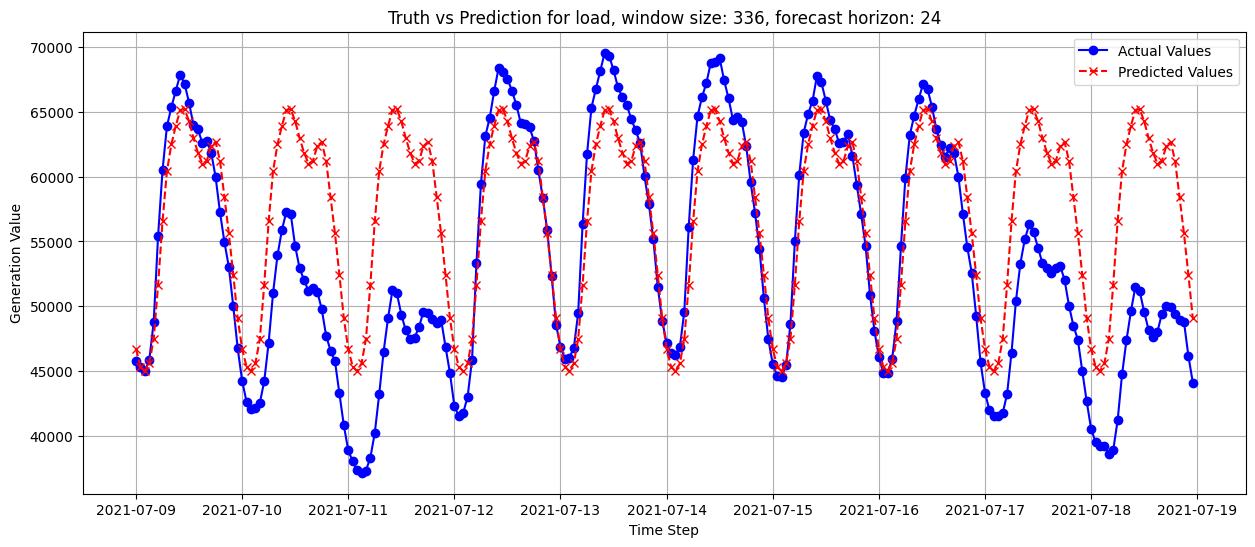

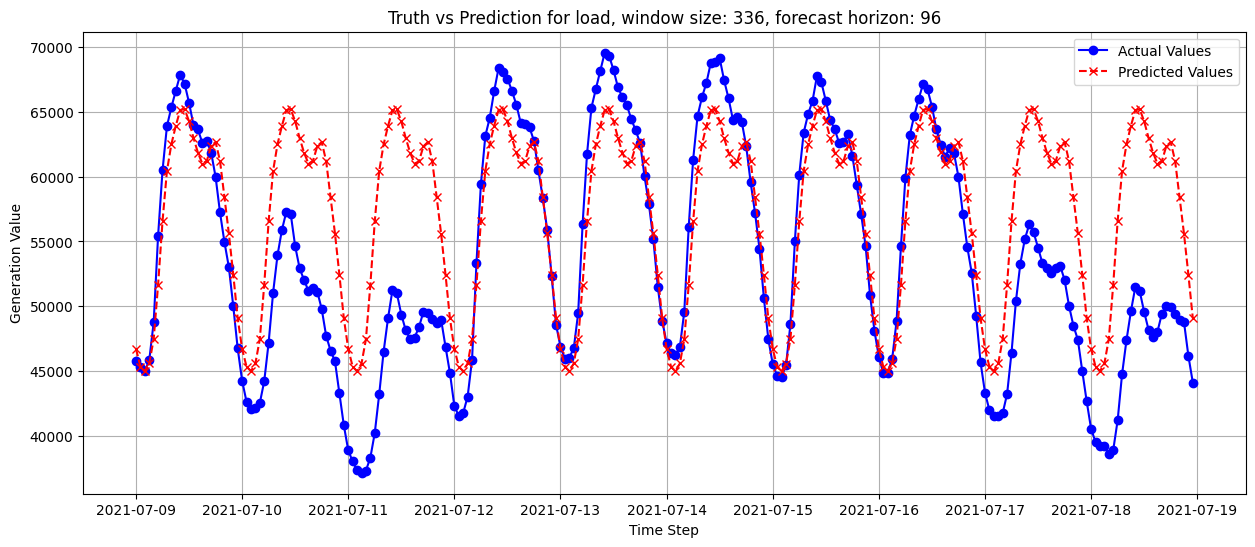

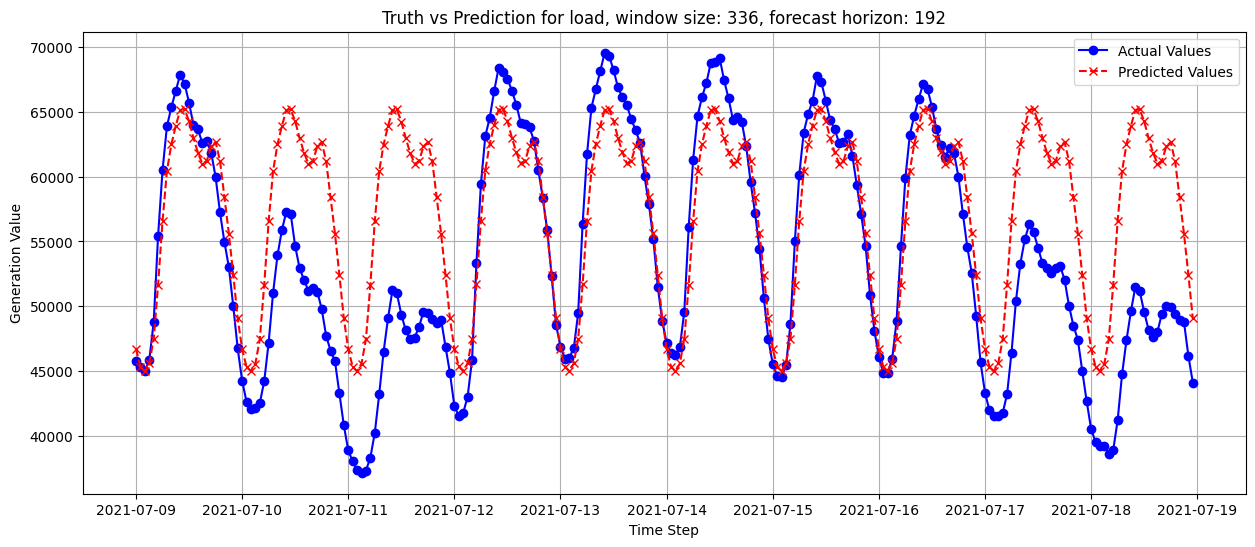

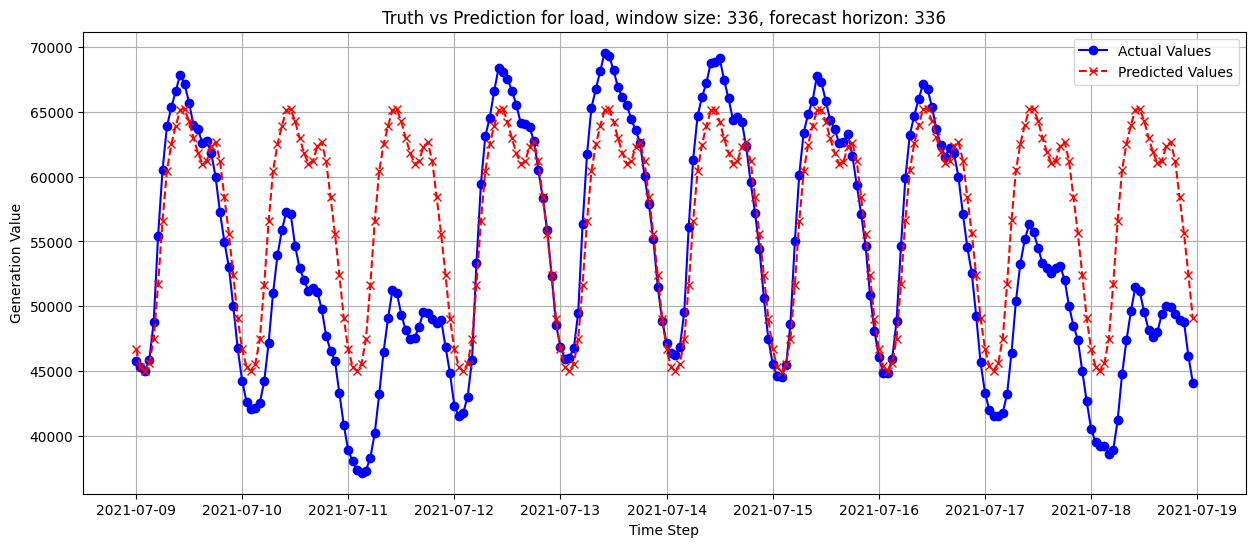

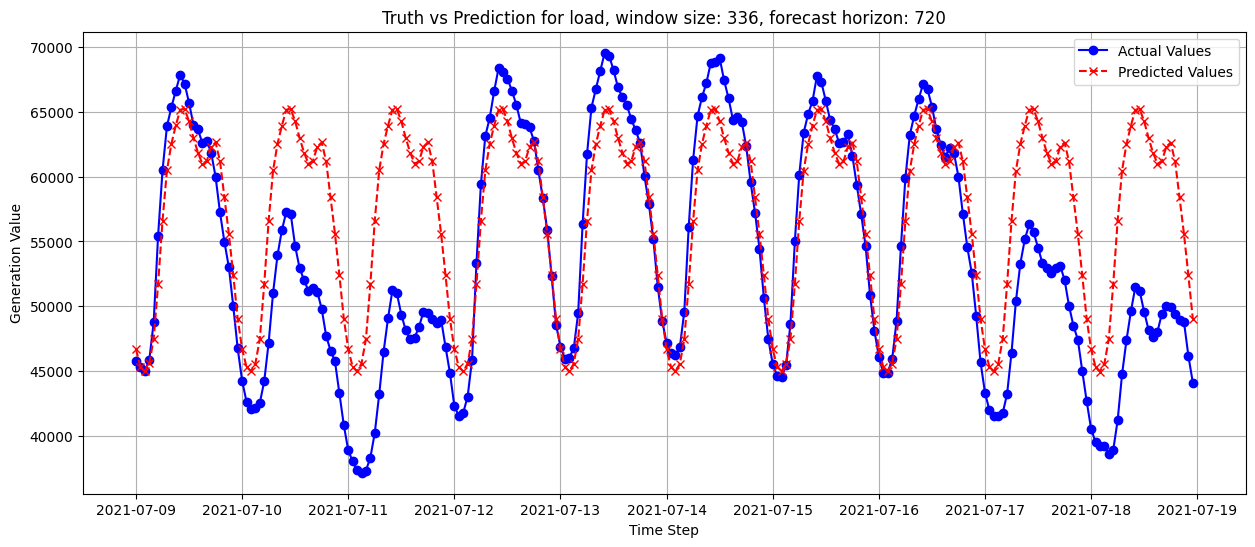

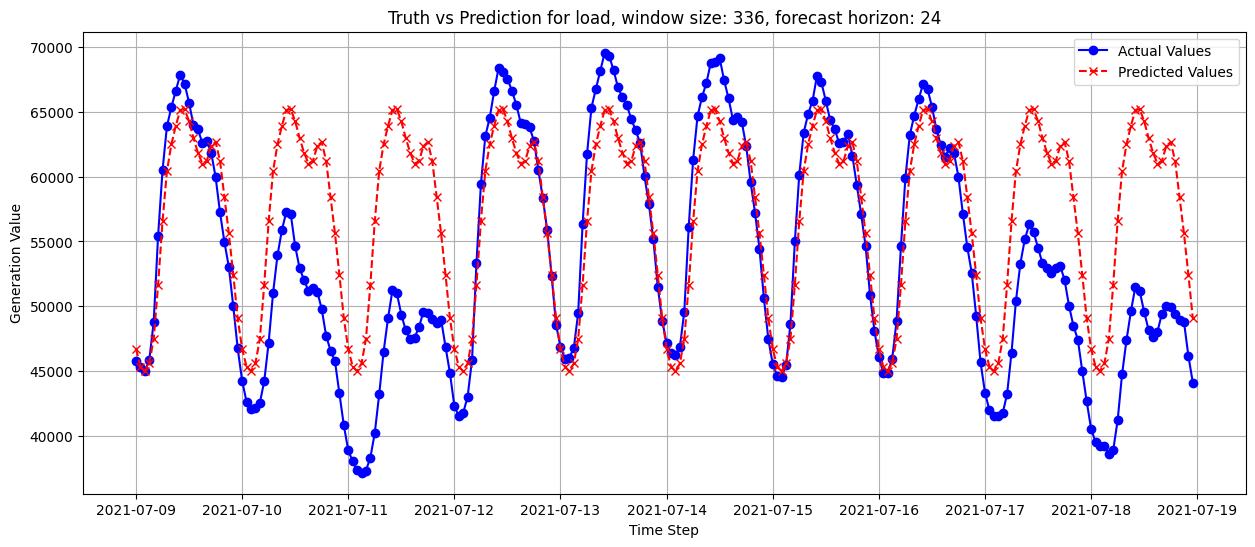

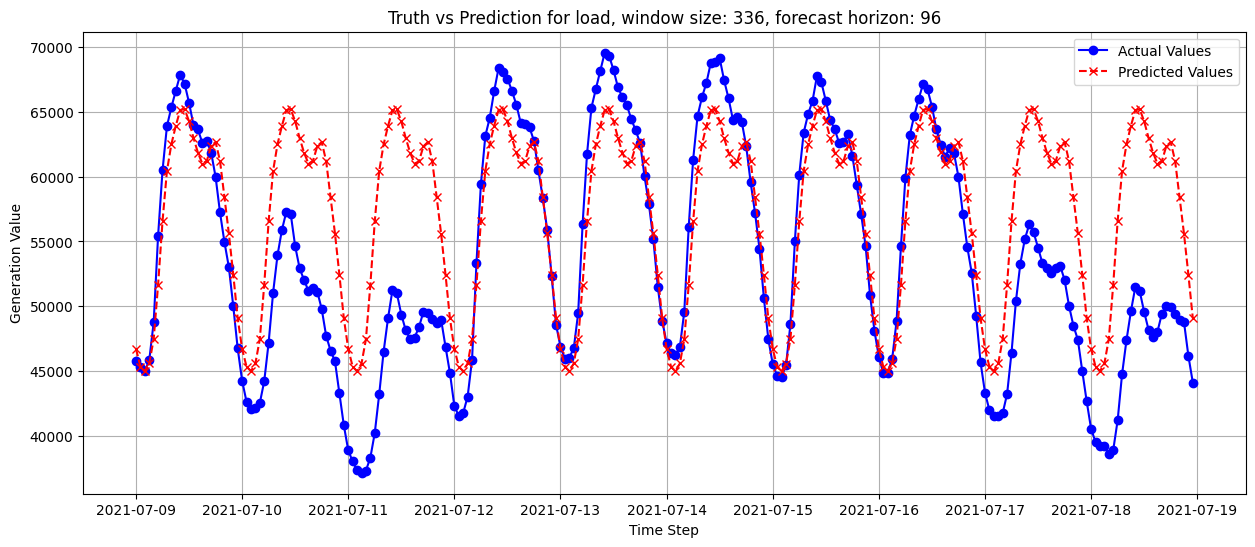

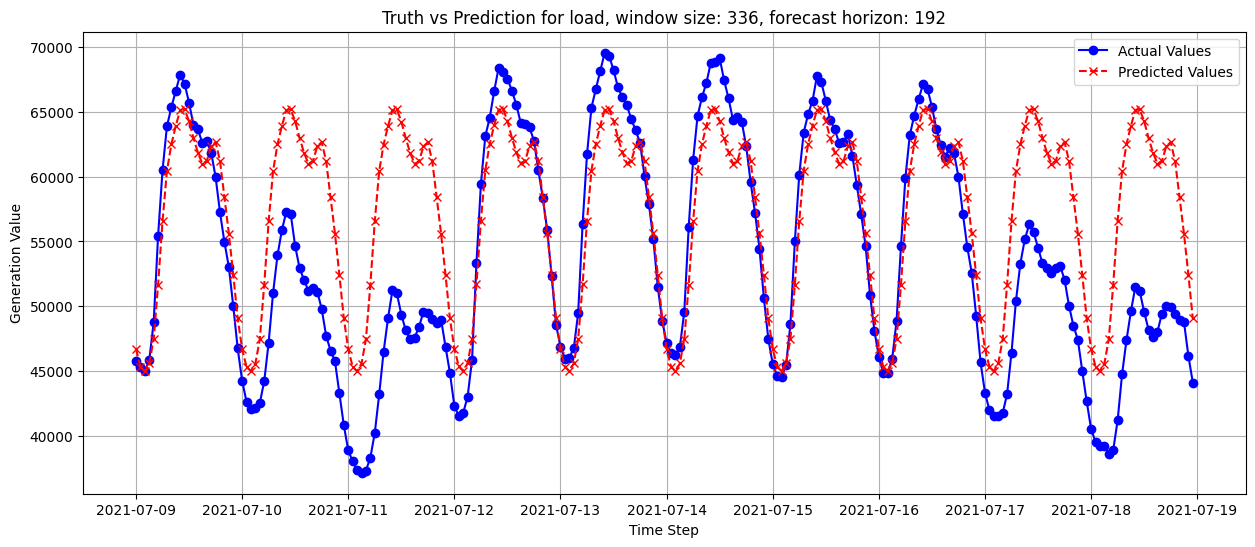

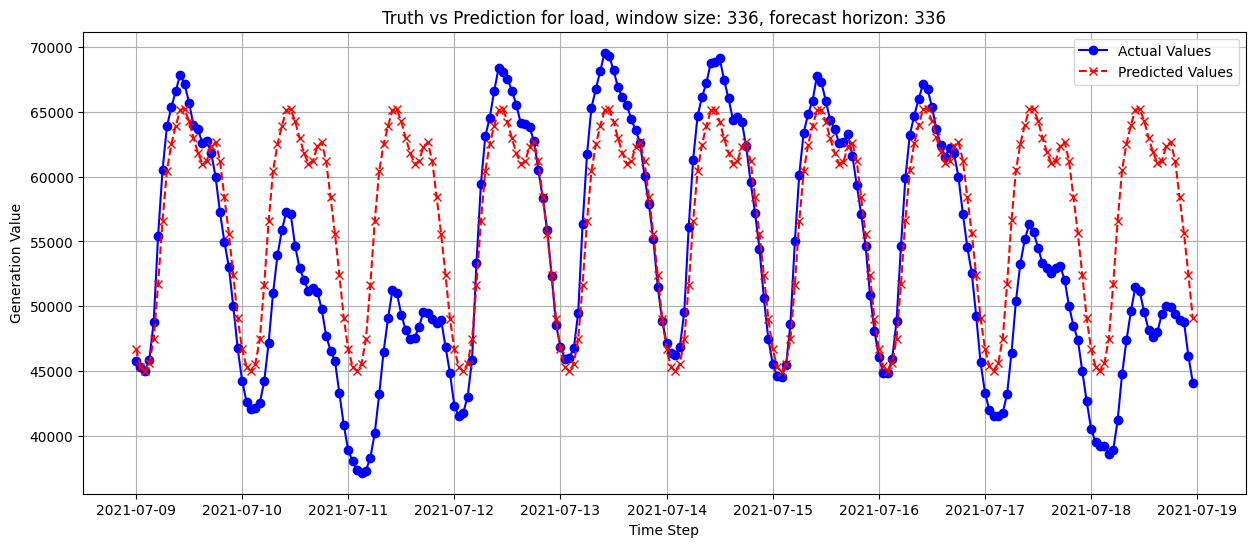

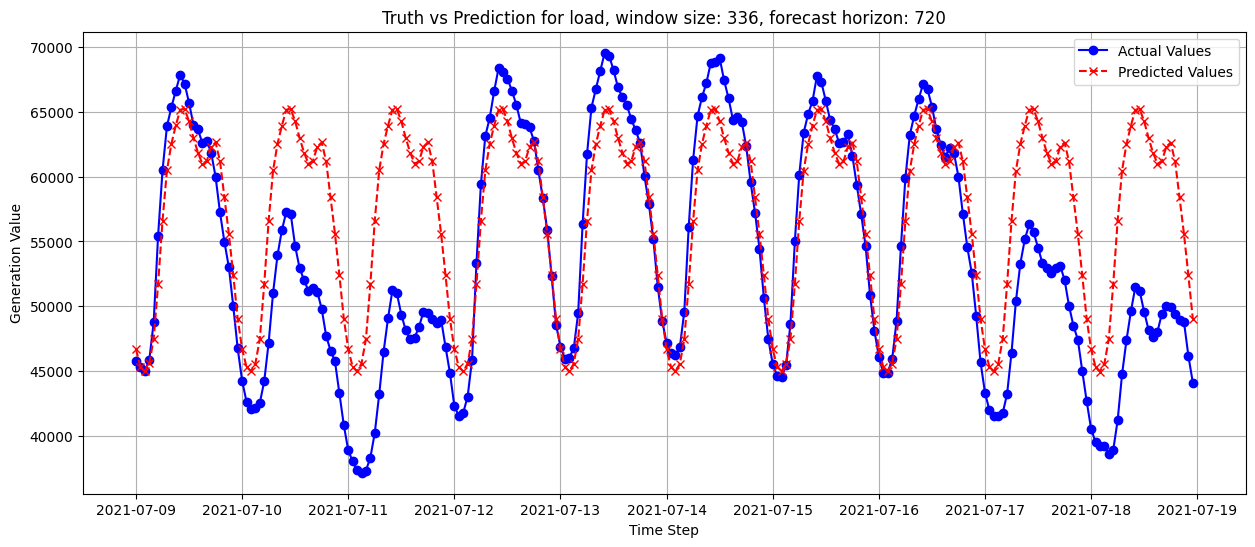

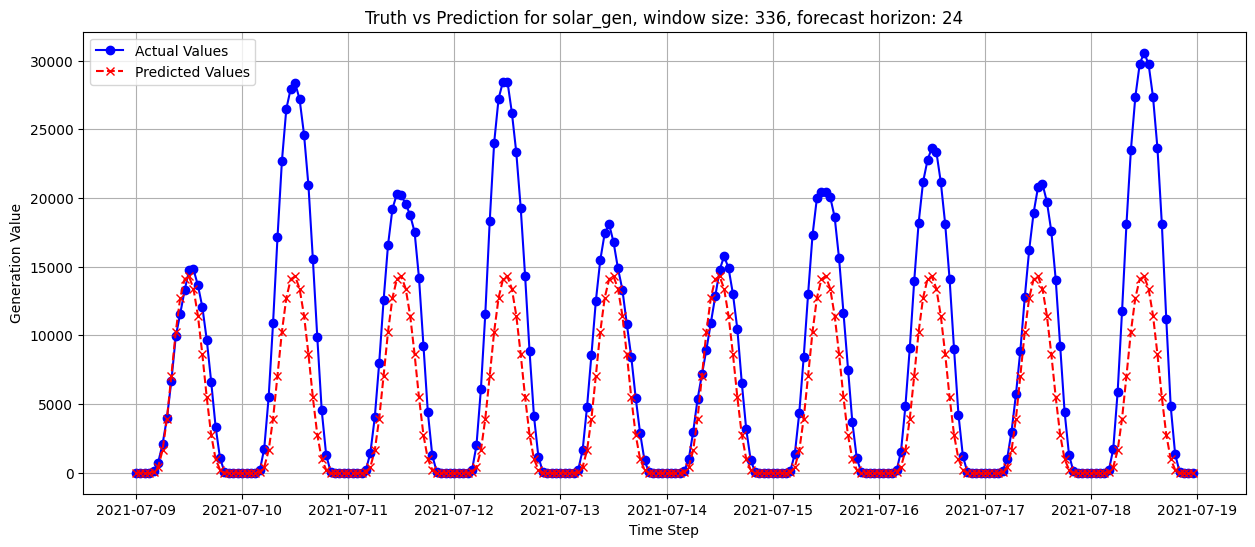

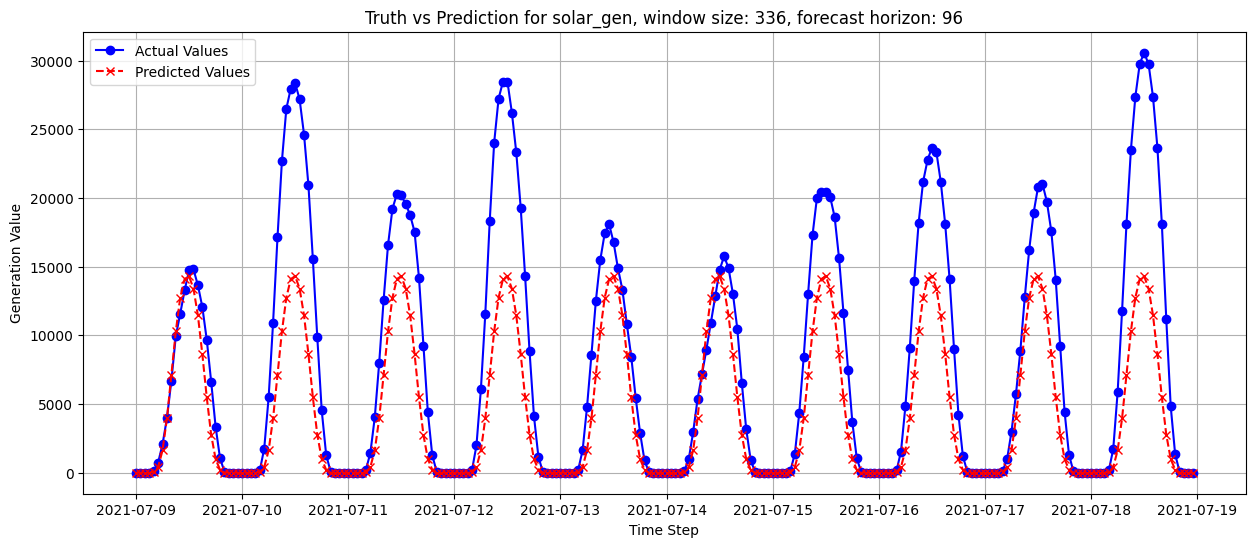

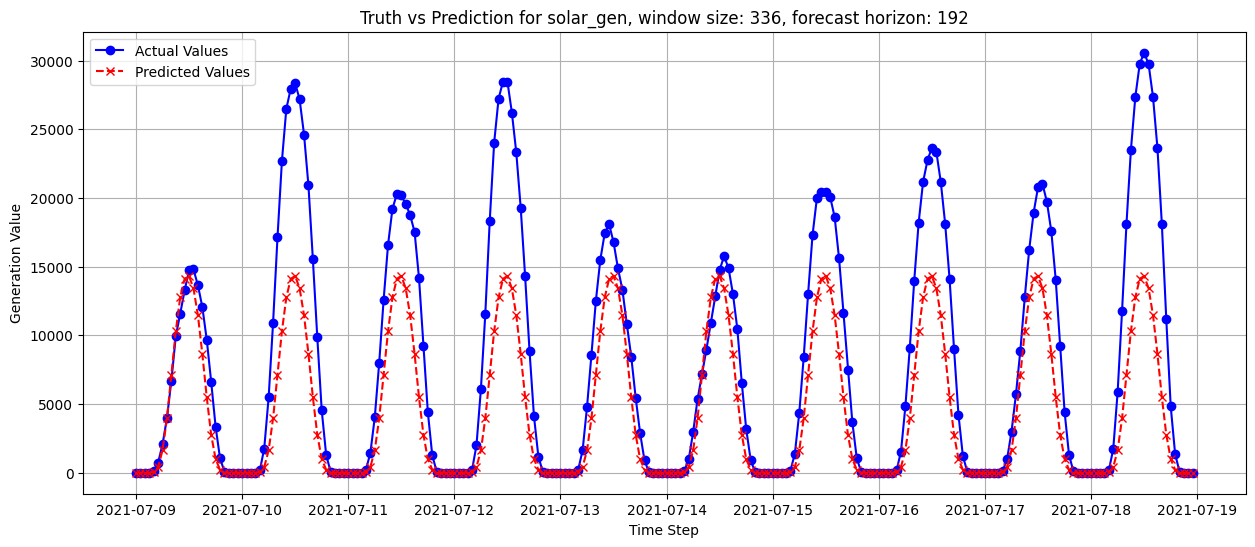

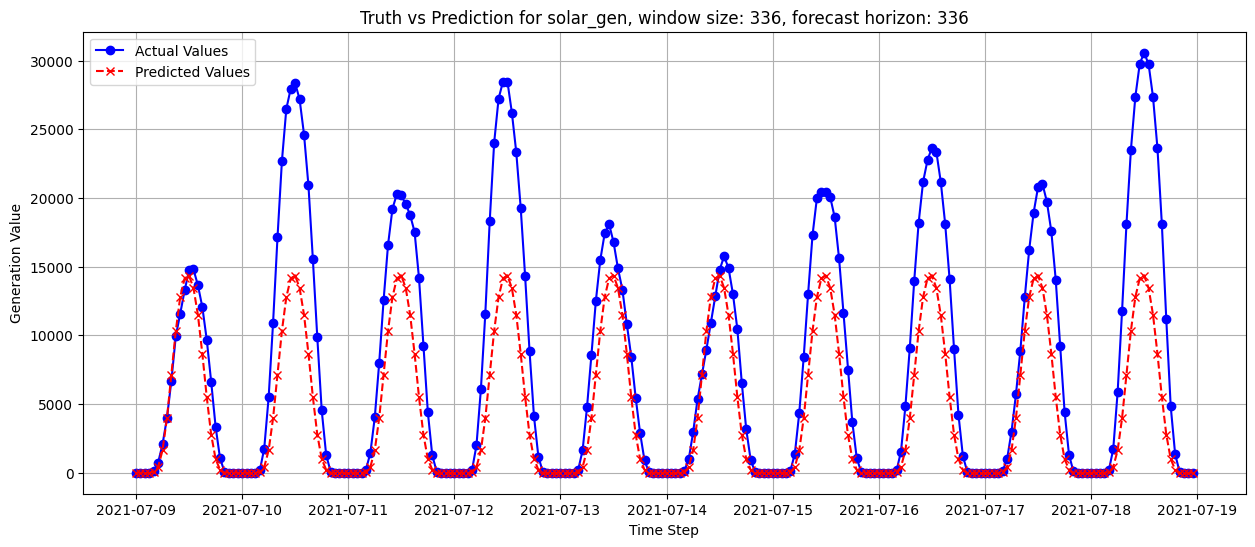

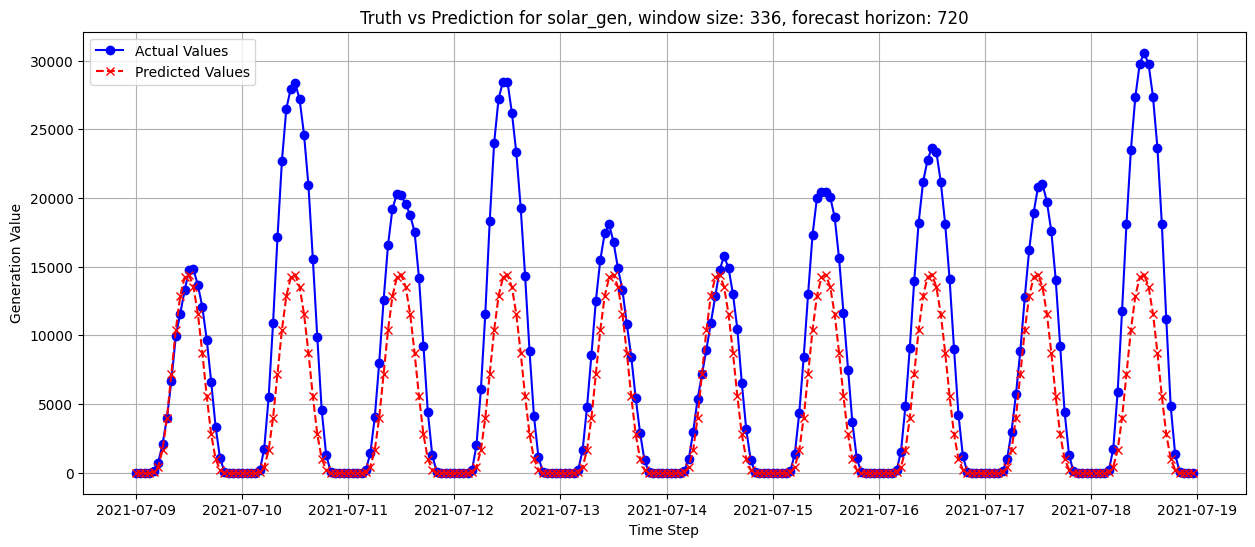

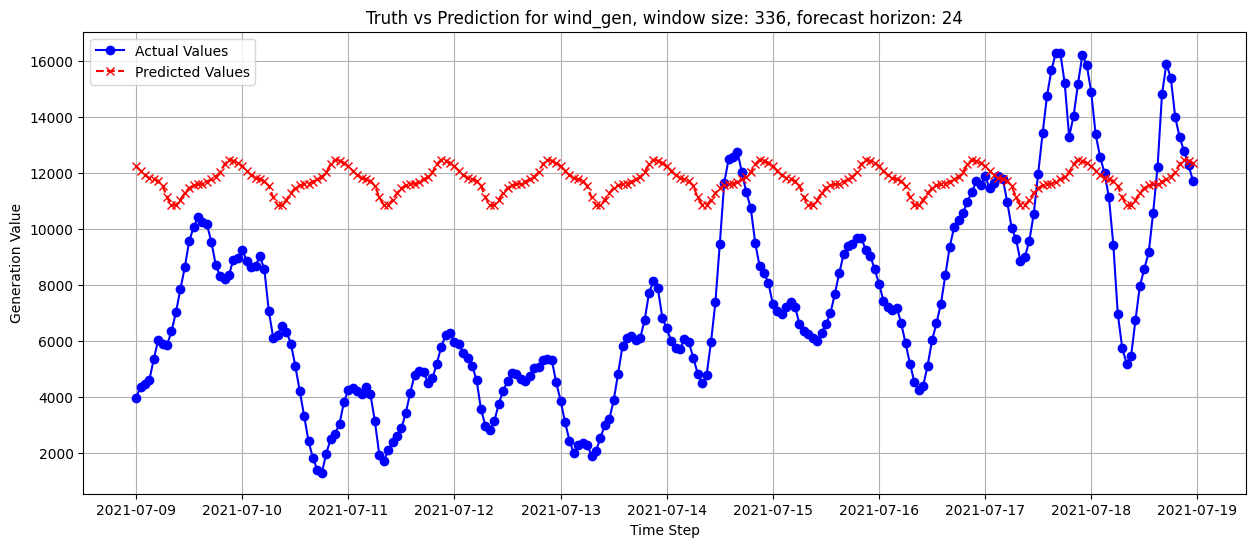

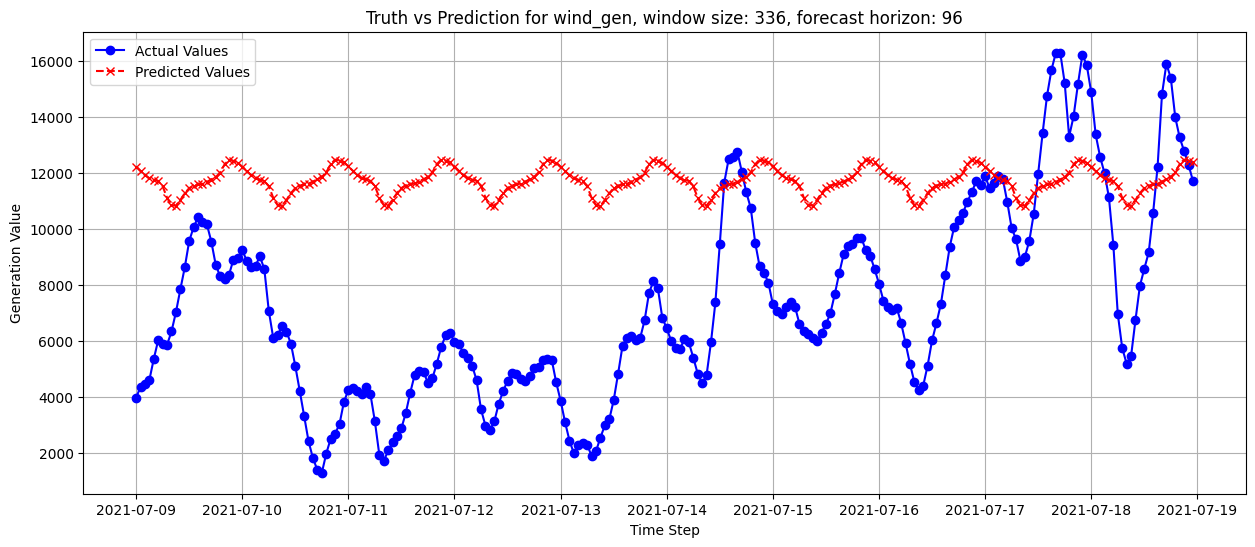

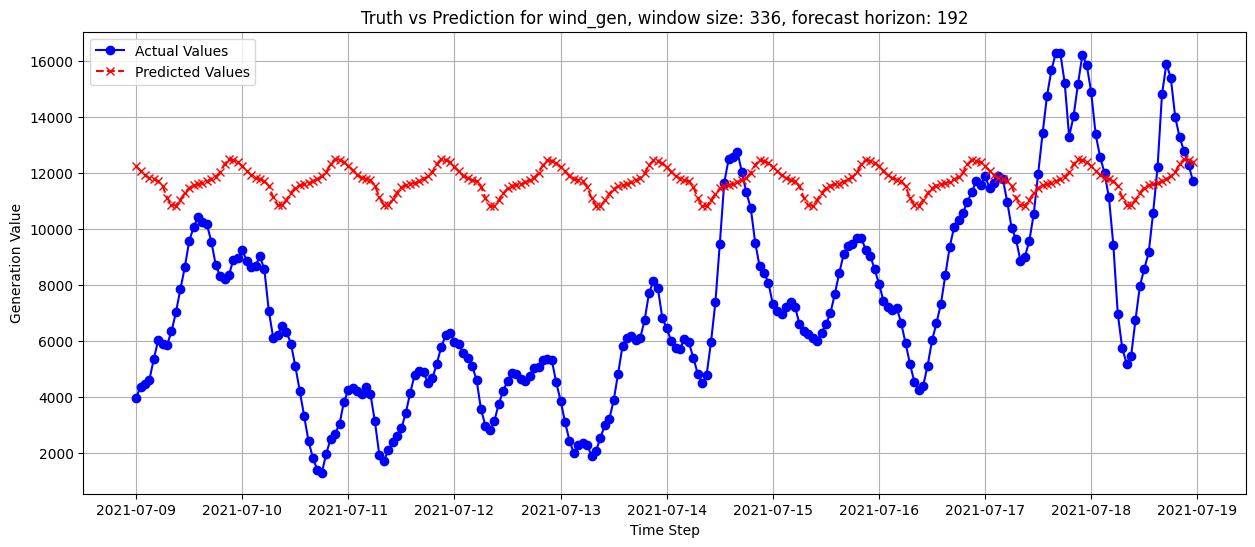

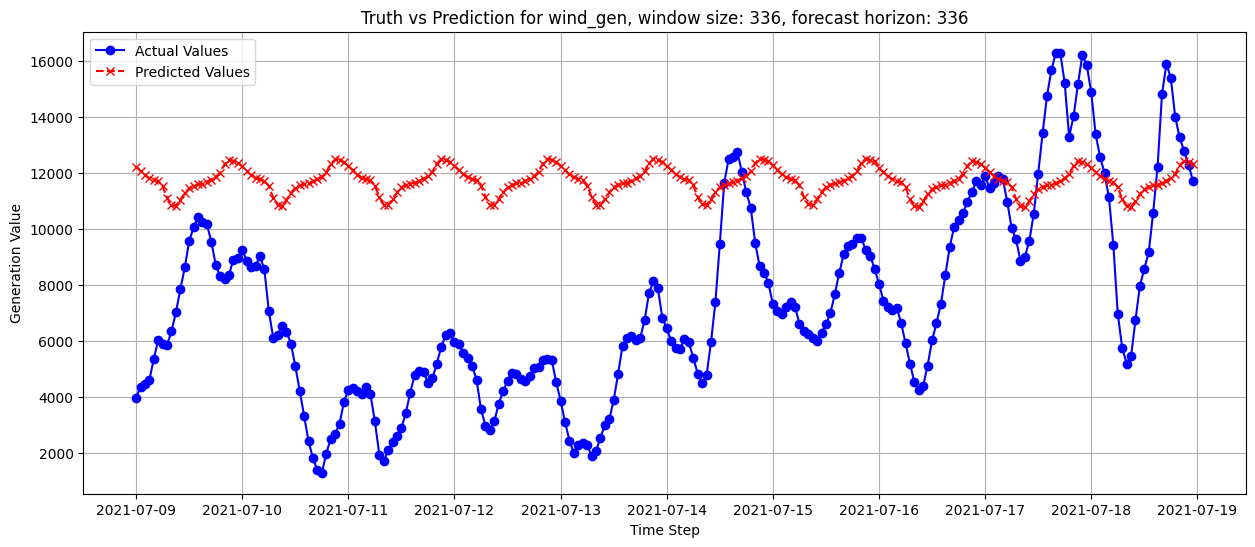

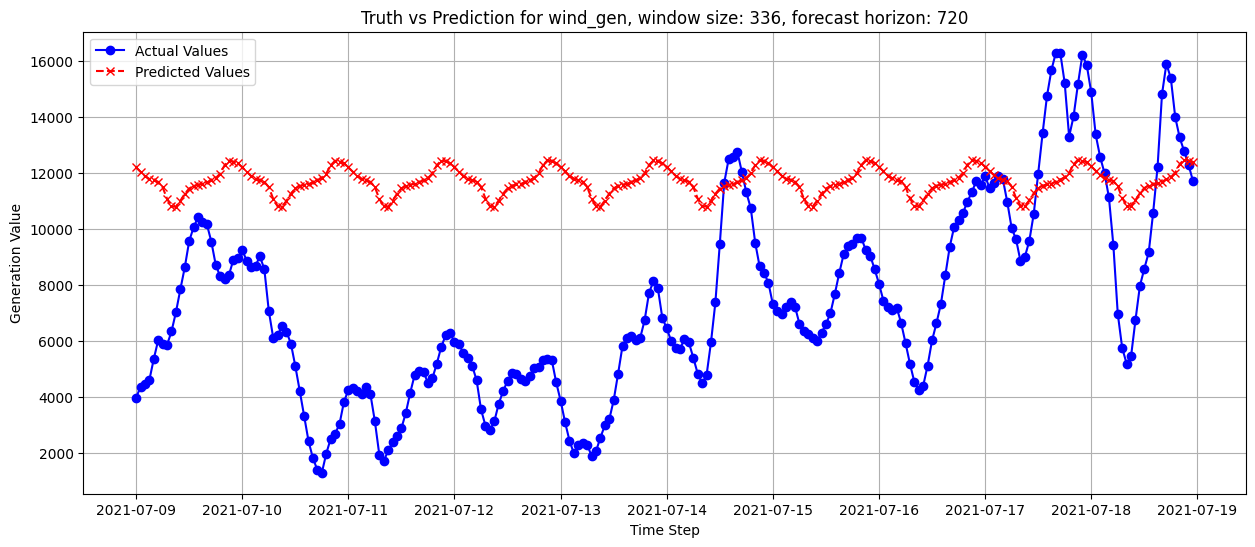

In [3]:
run_non_deepl.pipeline(args)